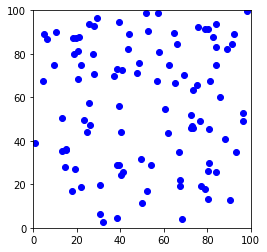

In [252]:
import numpy as np
import matplotlib.pyplot as plt
import math


x, y = [np.random.uniform(0,100,100) for _ in range(2)]

plt.scatter(x, y, color='blue')
plt.xlim(0,100)
plt.ylim(0,100)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

We now need to subject the dataset to random rotations and translations in order to generate the second dataset

In [253]:
def rand_translation(x, y):
    shift_x, shift_y = [np.random.rand()*20 - 10 for _ in range(2)]
    return x + np.full((100), shift_x), y + np.full((100), shift_y)

def rand_rotation(x, y):
    theta = np.random.rand()*np.pi/2 - np.pi/4
    rot_x = math.cos(theta)*x - math.sin(theta)*y
    rot_y = math.sin(theta)*x + math.cos(theta)*y
    return rot_x, rot_y


In [254]:
x_other, y_other = rand_translation(*rand_rotation(*rand_translation(*rand_rotation(x, y)))) #a bunch of random translations and rotations

[]

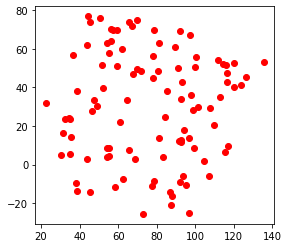

In [255]:
plt.scatter(x_other, y_other, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot()

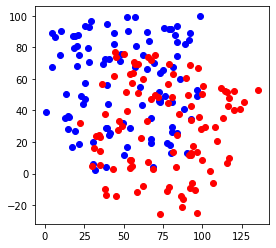

In [256]:
plt.scatter(x, y, color='blue')
plt.scatter(x_other, y_other, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Solution
Note that if we take the center of mass of the points (since the weight of all data points is the same, this corresponds to the average coordinate) in both the graphs, the vector connecting the two COMs will give us the translation deviation between the two graphs.

For rotation, create a vector starting from the COM and ending at the data point closest (with the least distance) to the COM. The angular difference between the vectors for the two graphs will denote the rotational deviations between the two graphs.

Now, what do these translational and rotational deviation mean? They tell us how the (cartesian) coordinates of one of the non-overlapping graphs need to be translated and rotated so that the two graphs coincide.

In [257]:
COM_x, COM_y = np.average(x), np.average(y)
COM_x_other, COM_y_other = np.average(x_other), np.average(y_other)

dist_from_COM = np.sqrt(np.square(x - np.full(100, COM_x)) + np.square(y - np.full(100, COM_y)))
least_dist_index = np.argmin(dist_from_COM)
nearest_x, nearest_y = x[least_dist_index], y[least_dist_index]

dist_from_COM_other = np.sqrt(np.square(x_other - np.full(100, COM_x_other)) + np.square(y_other - np.full(100, COM_y_other)))
least_dist_index_other = np.argmin(dist_from_COM_other)
nearest_x_other, nearest_y_other = x_other[least_dist_index_other], y_other[least_dist_index_other]

In [258]:
translation_vector = [COM_x_other - COM_x, COM_y_other - COM_y]

#now, we find the angle needed to rotate about the COM of the original graph to coincide with the other graph
#of course, if we want to do the opposite, then the angle (and the translation vector) is multiplied by -1 

COM_to_nearest = [nearest_x - COM_x, nearest_y - COM_y]
COM_to_nearest_other =  [nearest_x_other - COM_x_other, nearest_y_other - COM_y_other]

angle = np.arccos(np.dot(COM_to_nearest, COM_to_nearest_other)/(np.linalg.norm(COM_to_nearest)*np.linalg.norm(COM_to_nearest_other))) # cos theta = a dot b / (mag a * mag b)
angle = np.arctan2(COM_to_nearest_other[1], COM_to_nearest_other[0]) - np.arctan2(COM_to_nearest[1], COM_to_nearest[0])

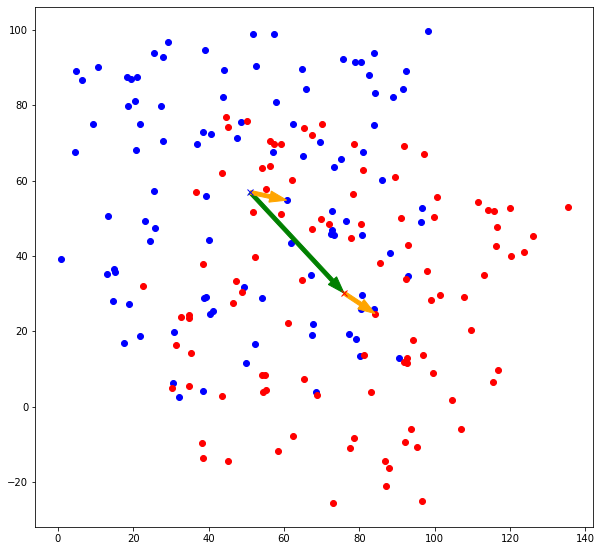

Angular deviation from graph 1 to graph 2: -21.27426927511965 degrees.
Vector to shift graph 1 to graph 2: (24.860126536402028, -26.73225136164134)


In [259]:
plt.figure(figsize=(10, 10))

plt.scatter(x, y, color='blue')
plt.scatter(x_other, y_other, color='red')

plt.plot(COM_x, COM_y, marker='x', color='blue')
plt.plot(COM_x_other, COM_y_other, marker='x', color='red')

plt.arrow(COM_x, COM_y, translation_vector[0], translation_vector[1], color='green', width=1, length_includes_head=True)

plt.arrow(COM_x, COM_y, COM_to_nearest[0], COM_to_nearest[1], color='orange', width=1,  length_includes_head=True)
plt.arrow(COM_x_other, COM_y_other, COM_to_nearest_other[0], COM_to_nearest_other[1], color='orange', width=1,  length_includes_head=True)

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print("Angular deviation from graph 1 to graph 2:", angle*180/np.pi, "degrees.")
print("Vector to shift graph 1 to graph 2:", (translation_vector[0], translation_vector[1]))